In [1]:
startTime = '2018-10-27 00:00:00'
endTime = None
symbol = 'XBTUSD'

In [2]:
from bitmex.bitmexREST import bitmexREST
from bitmex.bitmexAccountSettings import bitmexAccountSettings

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
acc = bitmexAccountSettings()
acc.from_config_file('../bitmex/BITMEX_connect.json')

In [4]:
rest = bitmexREST(apiKey=acc.apiKey, apiSecret=acc.apiSecret, isTestNet=acc.isTestNet)

execution_result = rest.query_history_execution(symbol, startTime, endTime)

df_exec = pd.DataFrame(execution_result)
df_exec['DATETIME'] = pd.to_datetime(df_exec['timestamp'])
df_exec

,account,avgPx,clOrdID,commission,cumQty,execComm,execID,execType,lastPx,lastQty,...,ordStatus,ordType,orderID,orderQty,price,side,symbol,text,timestamp,DATETIME
0,101488,6408.50,,0.000750,3,35.0,642b15c9-67ee-d473-1ab6-62339a458974,Trade,6408.50,3.0,...,Filled,Limit,a5786111-73d8-fcd8-1237-29c9135d370c,3,6408.50,Buy,XBTUSD,Submission from testnet.bitmex.com,2018-10-27T03:45:53.204Z,2018-10-27 03:45:53.204
1,101488,6408.50,,0.000750,10,117.0,9cb8f756-a17d-7d19-047b-54f5c1abd4ed,Trade,6408.50,10.0,...,Filled,Limit,da51cc3c-d665-e82b-5b6d-74a4682a58cc,10,6409.00,Buy,XBTUSD,Submission from testnet.bitmex.com,2018-10-27T03:46:28.259Z,2018-10-27 03:46:28.259
2,101488,6417.13,,-0.000184,97,-278.0,0e16e649-d5e4-f822-9ec6-680139846227,Funding,6417.13,97.0,...,Filled,Limit,00000000-0000-0000-0000-000000000000,97,6417.13,,XBTUSD,Funding,2018-10-27T04:00:00.081Z,2018-10-27 04:00:00.081
3,101488,6411.00,1540616102912695,0.000750,100,1169.0,b071b879-01e9-0ecd-8935-673fcf70eb64,Trade,6411.00,100.0,...,Filled,Market,17b26017-932d-5ff4-daa0-26b8a4ec6f71,100,6411.00,Sell,XBTUSD,[API][2018-10-27 12:55:02.912705],2018-10-27T04:55:02.568Z,2018-10-27 04:55:02.568
4,101488,NaN,1540621805429769,NaN,0,NaN,f002fb6c-309a-603b-ce4f-da97b96ee809,New,NaN,NaN,...,New,Market,990ccc52-9ad3-7f0c-953f-ccbeaed6b808,100,6411.00,Sell,XBTUSD,[API][2018-10-27 14:30:05.429780],2018-10-27T06:30:05.154Z,2018-10-27 06:30:05.154
5,101488,6411.00,1540621805429769,0.000750,100,1169.0,d451e803-3ec9-a773-d9ed-b36115e1a803,Trade,6411.00,100.0,...,Filled,Market,990ccc52-9ad3-7f0c-953f-ccbeaed6b808,100,6411.00,Sell,XBTUSD,[API][2018-10-27 14:30:05.429780],2018-10-27T06:30:05.154Z,2018-10-27 06:30:05.154
6,101488,NaN,1540621806955668,NaN,0,NaN,50e7c7a0-be58-004b-e8ee-b21ddf305178,New,NaN,NaN,...,New,Limit,b5cfd3a0-2fa1-e40e-bc71-3db6051f6b17,120,6365.00,Buy,XBTUSD,[API][2018-10-27 14:30:06.955673],2018-10-27T06:30:06.651Z,2018-10-27 06:30:06.651


In [6]:
rest_no_auth = bitmexREST(None, None, True)
market_result = rest_no_auth.query_history_bars(symbol, startTime, endTime, '1m')

df_market = pd.DataFrame(market_result)
df_market

,close,foreignNotional,high,homeNotional,lastSize,low,open,symbol,timestamp,trades,turnover,volume,vwap
0,6407.0,1100,6407.0,0.171688,500.0,6407.0,6407.0,XBTUSD,2018-10-27T00:00:00.000Z,3,17168800,1100,6407.0000
1,6407.5,345913,6407.5,53.988042,61.0,6407.0,6407.0,XBTUSD,2018-10-27T00:01:00.000Z,42,5398804186,345913,6407.3813
2,6407.5,66575,6407.5,10.390360,8.0,6407.5,6407.5,XBTUSD,2018-10-27T00:02:00.000Z,18,1039036025,66575,6407.5000
3,6407.0,17261,6407.0,2.694097,10000.0,6407.0,6407.5,XBTUSD,2018-10-27T00:03:00.000Z,5,269409688,17261,6407.0000
4,6407.5,1081,6407.5,0.168713,881.0,6407.0,6407.0,XBTUSD,2018-10-27T00:04:00.000Z,3,16871267,1081,6407.3813
5,6407.5,0,6407.5,0.000000,NaN,6407.5,6407.5,XBTUSD,2018-10-27T00:05:00.000Z,0,0,0,NaN
6,6407.5,17487,6407.5,2.729196,3.0,6407.5,6407.5,XBTUSD,2018-10-27T00:06:00.000Z,4,272919609,17487,6407.5000
7,6407.0,109,6407.5,0.017012,2.0,6407.0,6407.5,XBTUSD,2018-10-27T00:07:00.000Z,3,1701165,109,6407.3813
8,6407.0,100,6407.0,0.015608,100.0,6407.0,6407.0,XBTUSD,2018-10-27T00:08:00.000Z,1,1560800,100,6407.0000
9,6407.5,224,6407.5,0.034962,6.0,6407.0,6407.0,XBTUSD,2018-10-27T00:09:00.000Z,2,3496186,224,6407.3813


(<matplotlib.collections.LineCollection at 0x10d38d1d0>,
 <matplotlib.collections.PolyCollection at 0x119f2d9e8>)

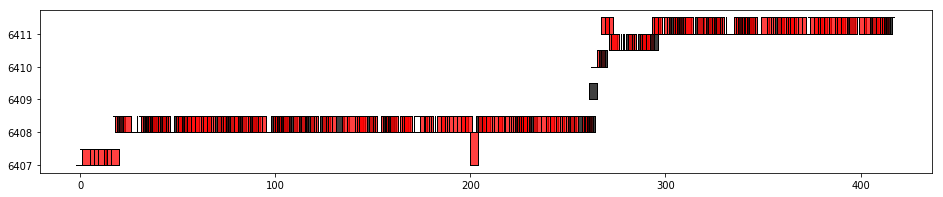

In [28]:
from matplotlib.finance import candlestick2_ohlc
# matplotlib.finance.candlestick2_ochl(ax, opens, closes, highs, lows, width=4, colorup='k', colordown='r', alpha=0.75)

fig = plt.figure(figsize=(16,3))
ax = fig.add_subplot(111)

candlestick2_ohlc(ax, df_market['open'], df_market['close'], df_market['high'], df_market['low'])

In [20]:
df_Exec_Trade = df_exec.query('execType == "Trade"')
df_Exec_New = df_exec.query('execType == "New"')
df_Exec_Canceled = df_exec.query('execType == "Canceled"')

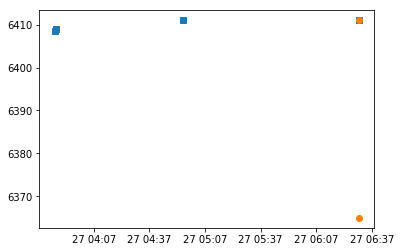

In [25]:
plt.plot(df_Exec_Trade.DATETIME, df_Exec_Trade.price, 's')
plt.plot(df_Exec_New.DATETIME, df_Exec_New.price, 'o')
plt.plot(df_Exec_Canceled.DATETIME, df_Exec_Canceled.price, '*')